In [1]:
# Market Mix Modelling(MMM) - Statistical method to analyze the impact
# of marketing campaigns like offline and Online Advertising, etc. on
# Sales.

# Advertising is the most critical marketing strategy adopted by companies
# and impact of advertising campaigns on sales is primary concern.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Datasets'

/Users/rajeshprabhakarkaila/Desktop/Datasets


In [4]:
mmmdf=pd.read_excel("MMM.xlsx")

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
mmmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BrandName            263 non-null    object 
 1   Brand ID             263 non-null    int64  
 2   Year                 263 non-null    int64  
 3   Absolut              263 non-null    int64  
 4   Aristocrat           263 non-null    int64  
 5   Barton               263 non-null    int64  
 6   Belvedere            263 non-null    int64  
 7   Burnett              263 non-null    int64  
 8   Chopin               263 non-null    int64  
 9   Crystal Palac        263 non-null    int64  
 10  Finlandia            263 non-null    int64  
 11  Fleischmann's        263 non-null    int64  
 12  Fris                 263 non-null    int64  
 13  Gilbey's             263 non-null    int64  
 14  Gordon's             263 non-null    int64  
 15  Grey Goose           263 non-null    int

In [6]:
mmmdf.BrandName.unique()

array(['Absolut', 'Aristocrat', 'Barton', 'Belvedere', 'Burnett',
       'Chopin', 'Crystal Palac', 'Finlandia', "Fleischmann's", 'Fris',
       "Gilbey's", "Gordon's", 'Grey Goose', 'Kamchatka', 'Ketel One',
       'Level', 'McCormick', 'Polar Ice', 'Popov', 'Pravda', "Seagram's",
       'Skol', 'Sky', 'Smirnoff', 'Stolicnaya', 'Tanqueray',
       'Three Olives'], dtype=object)

In [7]:
aristocrat=mmmdf[mmmdf.BrandName=='Aristocrat']

In [12]:
aristocrat.columns

Index(['BrandName', 'Brand ID', 'Year', 'Absolut', 'Aristocrat', 'Barton',
       'Belvedere', 'Burnett', 'Chopin', 'Crystal Palac', 'Finlandia',
       'Fleischmann's', 'Fris', 'Gilbey's', 'Gordon's', 'Grey Goose',
       'Kamchatka', 'Ketel One', 'Level', 'McCormick', 'Polar Ice', 'Popov',
       'Pravda', 'Seagram's', 'Skol', 'Sky', 'Smirnoff', 'Stolicnaya',
       'Tanqueray', 'Three Olives', 'TotalSales', 'LagTotalSales',
       '2LagTotalSales', 'LnSales', 'LnLSales', 'Ln2Lsales', 'LnDiff', 'diff',
       'IfDom', 'DollarSales', 'PriceRerUnit', 'LagPrice', 'LnPrice',
       'LnLPrice', 'Mag', 'News', 'Outdoor', 'Broad', 'Print', 'LnMag',
       'LnNews', 'LnOut', 'LnBroad', 'LnPrint', 'Tier1', 'Tier2',
       'TotalMinusSales', 'LagTotalMinusSales', 'TierSales',
       'OutsideTierSales', 'LagTierSales', 'LagOutsideTierSales', 'Firstintro',
       'Marketshare', 'LagMktshare', 'YearID', 'total ad'],
      dtype='object')

In [13]:
# Ln - Logarthmic Transformation
# Lag - shift in data
# y      -  1, 2, 3, 4, 5, 6, 7
# lag1y  -     1, 2, 3, 4, 5, 6, 7

In [14]:
aristocrat_df=aristocrat[['LnSales','LnPrice']]

In [15]:
aristocrat_df.corr()

,LnSales,LnPrice
LnSales,1.000000,-0.674301
LnPrice,-0.674301,1.000000


<Axes: xlabel='LnPrice', ylabel='LnSales'>

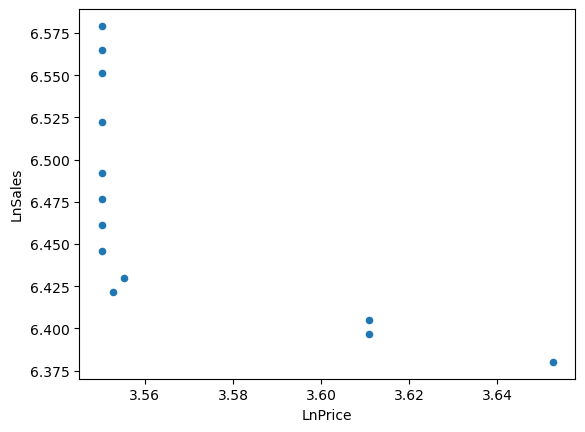

In [17]:
aristocrat_df.plot(x='LnPrice',y='LnSales',kind="scatter")

In [20]:
import statsmodels.formula.api as sm

In [21]:
pricereg=sm.ols(formula='LnSales~LnPrice',data=aristocrat_df).fit()

In [22]:
pricereg.summary()

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     9.172
Date:                Fri, 11 Aug 2023   Prob (F-statistic):             0.0115
Time:                        10:31:51   Log-Likelihood:                 21.254
No. Observations:                  13   AIC:                            -38.51
Df Residuals:                      11   BIC:                            -37.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1930      1.559      7.179      0.000       7.761      14.625
LnPrice       -1.3233      0.437     -3.028      0.011      -2.285      -0.362
==============================================================================
Omnibus:                        0.956   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.777
Skew:                           0.325   Prob(JB):                        0.678
Kurtosis:                       1.994   Cond. No.                         422.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
aristocrat_ads=aristocrat[['LnSales','LnMag','LnNews','LnOut','LnBroad',
                          'LnPrint','LnPrice']]

In [26]:
reg_ad=sm.ols(formula='LnSales~LnMag+LnOut+LnBroad+LnPrint+LnPrice',
             data=aristocrat_ads).fit()

In [28]:
reg_ad.summary()

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     9.172
Date:                Fri, 11 Aug 2023   Prob (F-statistic):             0.0115
Time:                        10:42:51   Log-Likelihood:                 21.254
No. Observations:                  13   AIC:                            -38.51
Df Residuals:                      11   BIC:                            -37.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1930      1.559      7.179      0.000       7.761      14.625
LnMag       3.903e-15   5.39e-16      7.236      0.000    2.72e-15    5.09e-15
LnOut          0.0001   1.56e-05      7.179      0.000    7.76e-05       0.000
LnBroad        0.0001   1.56e-05      7.179      0.000    7.76e-05       0.000
LnPrint        0.0001   1.56e-05      7.179      0.000    7.76e-05       0.000
LnPrice       -1.3233      0.437     -3.028      0.011      -2.285      -0.362
==============================================================================
Omnibus:                        0.956   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.777
Skew:                           0.325   Prob(JB):                        0.678
Kurtosis:                       1.994   Cond. No.                     1.02e+40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-78. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
# interaction terms enable you to examine whether the relationship between
# the target and the independent variable changes depending on the value 
# of another independent variable.

In [30]:
reg_ad_interaction=sm.ols(formula='LnSales~LnMag*LnOut+LnBroad*LnPrint+LnPrice',
             data=aristocrat_ads).fit()

In [31]:
reg_ad_interaction.summary()

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     9.172
Date:                Fri, 11 Aug 2023   Prob (F-statistic):             0.0115
Time:                        10:45:29   Log-Likelihood:                 21.254
No. Observations:                  13   AIC:                            -38.51
Df Residuals:                      11   BIC:                            -37.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.1930      1.559      7.179      0.000       7.761      14.625
LnMag            6.375e-15   8.99e-16      7.092      0.000     4.4e-15    8.35e-15
LnOut               0.0001   1.56e-05      7.179      0.000    7.76e-05       0.000
LnMag:LnOut              0          0        nan        nan           0           0
LnBroad             0.0001   1.56e-05      7.179      0.000    7.76e-05       0.000
LnPrint             0.0001   1.56e-05      7.179      0.000    7.76e-05       0.000
LnBroad:LnPrint  1.119e-09   1.56e-10      7.179      0.000    7.76e-10    1.46e-09
LnPrice            -1.3233      0.437     -3.028      0.011      -2.285      -0.362
==============================================================================
Omnibus:                        0.956   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.777
Skew:                           0.325   Prob(JB):                        0.678
Kurtosis:                       1.994   Cond. No.                     1.25e+45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-88. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
absolut=mmmdf[mmmdf.BrandName=="Absolut"]

In [34]:
absolut_ads=absolut[['LnSales','LnMag','LnNews','LnOut','LnBroad',
                          'LnPrint','LnPrice']]

In [35]:
reg_ad=sm.ols(formula='LnSales~LnMag+LnOut+LnBroad+LnNews+LnPrint+LnPrice',
             data=absolut_ads).fit()

In [36]:
reg_ad.summary()

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     13.96
Date:                Fri, 11 Aug 2023   Prob (F-statistic):            0.00270
Time:                        10:54:31   Log-Likelihood:                 23.293
No. Observations:                  13   AIC:                            -32.59
Df Residuals:                       6   BIC:                            -28.63
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6613      1.697      0.979      0.365      -2.491       5.814
LnMag          0.0891      0.062      1.438      0.200      -0.062       0.241
LnOut         -0.1219      0.106     -1.152      0.293      -0.381       0.137
LnBroad        0.0328      0.023      1.413      0.207      -0.024       0.090
LnNews         0.0131      0.012      1.132      0.301      -0.015       0.042
LnPrint        0.1101      0.081      1.366      0.221      -0.087       0.307
LnPrice        1.0968      0.253      4.332      0.005       0.477       1.716
==============================================================================
Omnibus:                        0.747   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.610
Skew:                           0.043   Prob(JB):                        0.737
Kurtosis:                       1.942   Cond. No.                     1.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
reg_ad_interact=sm.ols(formula='LnSales~LnMag*LnOut+LnOut*LnBroad+LnBroad*LnNews+LnNews*LnPrint+LnPrice',
                      data=absolut_ads).fit()

In [38]:
reg_ad_interact.summary()

/Users/rajeshprabhakarkaila/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     63.48
Date:                Fri, 11 Aug 2023   Prob (F-statistic):             0.0156
Time:                        11:01:51   Log-Likelihood:                 43.171
No. Observations:                  13   AIC:                            -64.34
Df Residuals:                       2   BIC:                            -58.13
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -26.0327     12.457     -2.090      0.172     -79.630      27.565
LnMag              0.2364      0.083      2.846      0.104      -0.121       0.594
LnOut              2.8529      1.780      1.603      0.250      -4.805      10.511
LnMag:LnOut       -0.2763      0.170     -1.621      0.246      -1.010       0.457
LnBroad            0.1661      0.117      1.420      0.292      -0.337       0.669
LnOut:LnBroad     -0.0709      0.018     -4.020      0.057      -0.147       0.005
LnNews            -0.9280      0.319     -2.907      0.101      -2.302       0.446
LnBroad:LnNews     0.0638      0.015      4.288      0.050      -0.000       0.128
LnPrint            2.1205      1.276      1.662      0.238      -3.369       7.609
LnNews:LnPrint     0.0462      0.025      1.881      0.201      -0.059       0.152
LnPrice            2.6195      0.372      7.044      0.020       1.019       4.220
==============================================================================
Omnibus:                        1.052   Durbin-Watson:                   2.453
Prob(Omnibus):                  0.591   Jarque-Bera (JB):                0.211
Skew:                           0.310   Prob(JB):                        0.900
Kurtosis:                       3.083   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""